<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [1]:
!wget https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV

--2021-12-02 21:21:48--  https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67183 (66K) [text/plain]
Saving to: ‘weight_data.CSV’

weight_data.CSV     100%[===================>]  65.61K  --.-KB/s    in 0.007s  

2021-12-02 21:21:48 (8.86 MB/s) - ‘weight_data.CSV’ saved [67183/67183]



# Linear Regression

## Import packages


In [46]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [53]:
data = pd.read_csv('weight_data.CSV',sep=';')
print("Loaded: ",len(data))
y = data.values[:,0]
x = data.values[:,1:]
data

Loaded:  199


,Real Weight,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
0,30,20.216734,20.591473,20.862815,21.082876,21.961170,23.008404,23.845369,25.852810,26.715498,28.738822,30.448866,30.165725,30.183971,28.252478,27.310475,25.953428,24.757809,24.057983,22.055484,20.114541,18.020647,17.390114,16.260420,14.431770,13.011104,11.320964,9.454773,8.205822
1,30,16.358580,17.948475,18.922227,19.341220,21.115006,22.996339,24.455895,26.089258,26.648218,28.489740,30.408361,30.405284,30.645241,29.286754,27.523205,25.633204,24.104316,23.409304,21.381818,21.141492,21.090736,20.030618,19.561854,17.596822,16.664926,14.639496,13.310592,11.921294
2,30,18.541974,19.393415,20.715872,20.794711,22.889283,24.044060,26.136841,26.822618,27.214711,28.648734,30.426228,30.811116,30.820215,30.439926,29.654349,28.919307,28.020054,25.840811,24.443338,23.255630,22.971649,21.885108,20.566558,20.156233,19.965342,17.914060,16.444254,15.250845
3,30,20.787830,21.712560,22.535063,23.615610,23.774196,24.938504,25.094124,26.149732,27.474697,29.129782,30.829622,30.343048,30.246423,29.857620,29.061254,27.445913,25.505077,25.278630,23.310526,21.513120,21.232630,20.735228,19.619537,17.569506,15.922942,14.703486,13.911107,13.233322
4,30,19.093744,20.634477,22.173730,22.392791,24.472763,25.323968,26.163234,27.975422,28.422492,28.663653,30.809908,30.392548,30.425185,28.969535,27.280572,25.419597,23.974121,23.526355,22.226838,20.443481,19.058634,17.707083,17.314882,17.232952,15.219103,13.907085,12.982010,11.025349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,75,65.469745,66.226849,66.500694,67.950649,70.017205,72.136103,73.023895,74.024775,74.558542,75.504318,75.641807,75.662575,75.874149,74.836788,74.240227,72.767795,71.826029,70.552868,70.490923,69.868137,69.693539,69.000679,67.005969,65.442489,64.641583,63.846277,63.783857,63.573616
195,75,63.816733,65.954598,65.964267,67.488364,68.382093,69.499717,71.276521,72.145537,72.694650,74.360400,75.925086,75.013339,75.349237,74.593905,72.901164,70.889756,70.762950,69.596962,69.064516,69.035449,68.610923,67.479043,66.771656,66.558410,65.700983,65.266628,64.743208,63.316108
196,75,65.786215,67.721361,69.824838,70.310168,71.307659,71.326052,72.050010,72.425910,73.954595,74.459107,75.541380,75.575889,75.091932,74.887379,73.002921,71.046006,70.949416,69.092364,67.873424,67.583285,67.507667,66.331702,65.345967,64.932141,63.734362,62.168726,60.683706,58.759285
197,75,62.688483,64.184743,65.896784,67.294109,67.385624,68.396841,70.167959,71.637006,73.780966,73.942565,75.752993,75.030943,75.166614,73.662947,72.206403,71.847554,70.725120,70.437576,70.340370,69.493374,69.205394,67.770324,67.510636,65.492426,63.440658,61.856313,61.186599,61.010450


# PCA

Total Variance in our dataset is:  5935.689993207136
The 95% variance we want to have is:  5638.905493546778

Variance explain with 2 components:  5916.892885217763
Variance explain with 5 components:  5929.4216968538985
Variance explain with 10 components:  5933.173193426368
Variance explain with 12 components:  5933.711679924072
Variance explain with 18 components:  5934.794241771246
Variance explain with 20 components:  5935.039445384799
Variance explain with 28 components:  5935.689993207136


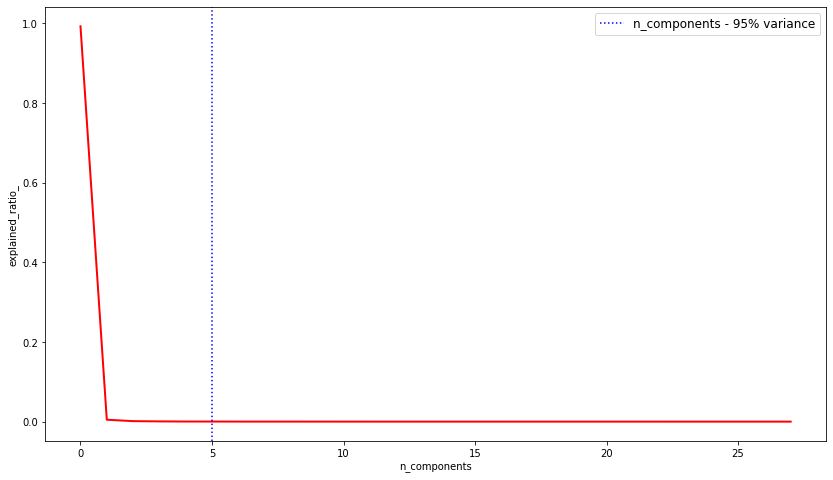

In [89]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 28 components: ", sum(a["Explained Variance"][0:28]))


# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(5,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

In [90]:
# Running PCA again

pca = PCA(n_components=5, random_state=453)
x_r = pca.fit(x).transform(x)

## Train test and split

In [91]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_r, y, random_state=30,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))




Labels distribution: Counter({70.0: 21, 35.0: 20, 40.0: 20, 45.0: 20, 50.0: 20, 55.0: 20, 60.0: 20, 75.0: 20, 30.0: 19, 65.0: 19})
Train labels distribution: Counter({60.0: 12, 75.0: 12, 40.0: 12, 30.0: 10, 70.0: 10, 35.0: 10, 45.0: 9, 55.0: 9, 65.0: 9, 50.0: 6})
Test labels distribution: Counter({50.0: 14, 70.0: 11, 45.0: 11, 55.0: 11, 65.0: 10, 35.0: 10, 30.0: 9, 60.0: 8, 40.0: 8, 75.0: 8})


In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(99, 5)
(100, 5)
(99,)
(100,)


## Train the model

In [93]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [94]:
y_pred = ml.predict(x_test)
print(y_pred)

[65.23904689 50.16394836 34.93276677 65.64190229 60.28208774 34.63076094
 59.87078999 65.24061796 59.64681559 69.17595552 44.49285221 49.63205268
 35.16067061 45.34569399 55.42718678 70.23380205 55.61411731 45.03594096
 49.79176787 69.88406951 50.21897197 64.76653634 59.4121463  39.76642928
 54.90537809 74.85253168 75.00175551 55.65622628 55.14416979 54.77453687
 65.3065375  39.90536167 35.18624439 55.02808994 39.98996787 34.64247556
 29.2630461  64.87526499 75.61033322 60.14397028 60.64559348 45.07609918
 50.59548644 64.65639227 39.87826504 29.68094239 29.29599152 70.23230158
 75.35504303 29.89424826 50.23153765 29.96771011 64.63805288 75.18573751
 45.17229723 50.34859277 30.40623702 60.4553519  34.52013791 70.59057753
 29.61406377 30.18749507 74.72986824 49.59322459 40.59298424 49.70371762
 55.75715369 44.90092563 64.72621794 35.41560259 69.64205088 45.32173628
 75.70571637 45.17627408 70.11084199 38.99660923 29.7255489  35.24757373
 70.54987444 49.39284259 39.2362171  45.04649468 49

In [95]:
ml.coef_

array([-0.18761331,  0.05446055,  0.21847959, -0.18367516,  0.15998928])

## Evaluate the model

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9991946447437947

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

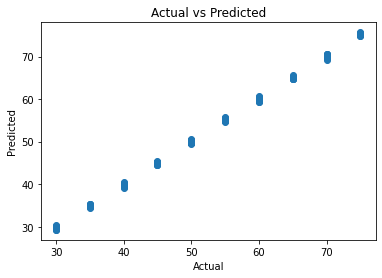

In [112]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')



In [102]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))


0.15361346156859382
0.39193553241393386


In [107]:
#Example on R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(y_test)
result = sm.OLS(y_pred, X_addC).fit()
print(result.rsquared, result.rsquared_adj)


0.9992549784700377 0.999247376209528
